In [ ]:
# Hyo Sung Kim and Chin Yee Lee
# MUSA 620 - Final Project

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [3]:
import geopandas as gpd
import cartopy.crs as ccrs
from shapely.geometry import Point

In [4]:
#from IPython.display import IFrame
#IFrame('chart.html', width=600, height=375)

In [5]:
# Importing Uber Data

In [118]:
# 2014
uber_apr14 = pd.read_csv("./UberData/uber-raw-data-apr14.csv")
uber_may14 = pd.read_csv("./UberData/uber-raw-data-may14.csv")
uber_jun14 = pd.read_csv("./UberData/uber-raw-data-jun14.csv")
uber_jul14 = pd.read_csv("./UberData/uber-raw-data-jul14.csv")
uber_aug14 = pd.read_csv("./UberData/uber-raw-data-aug14.csv")
uber_sep14 = pd.read_csv("./UberData/uber-raw-data-sep14.csv")

In [119]:
# Combined df should have x rows:
uber_apr14.shape[0]+uber_may14.shape[0]+uber_jun14.shape[0]+uber_jul14.shape[0]+uber_aug14.shape[0]+uber_sep14.shape[0]

4534327

In [120]:
# Combine 2014 data into one dataframe
frames = [uber_apr14, uber_may14, uber_jun14, uber_jul14, uber_aug14, uber_sep14]
uber_2014 = pd.concat(frames)

In [121]:
print(uber_2014.shape)
uber_2014.head()

(4534327, 4)


,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512


In [122]:
# Rename columns(Date/Time to DateTime)
uber_2014.columns = ['DateTime', 'Lat', 'Lon', 'Base']

In [123]:
# Add Type Column
uber_2014['Type'] = 'Uber'

In [124]:
# Add Hour Column
uber_2014['Hour'] = uber_2014['DateTime'].str[9:]
uber_2014['Hour'] = uber_2014['Hour'].str[:-6]
uber_2014.Hour=uber_2014.Hour.astype(int)

# Check
uber_2014.head()
#uber_2014.Hour.unique()

,DateTime,Lat,Lon,Base,Type,Hour
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512,Uber,0
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512,Uber,0
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512,Uber,0
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512,Uber,0
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512,Uber,0


In [125]:
# Select Columns of Interest
uber_cols = ['DateTime', 'Lat', 'Lon', 'Type', 'Hour']
uber_2014 = uber_2014[uber_cols]

In [126]:
uber_2014.head()

,DateTime,Lat,Lon,Type,Hour
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0


In [127]:
# Create Month Column
uber_2014['Month']=uber_2014['DateTime'].str[0]
uber_2014.Month=uber_2014.Month.astype(int)

# Check
uber_2014.head()
#uber_2014.Month.unique()

,DateTime,Lat,Lon,Type,Hour,Month
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,4
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,4
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,4
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,4
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,4


In [128]:
# Create Month Name Column
uber_2014.loc[uber_2014.Month == '4','MonthName'] = 'April'
uber_2014.loc[uber_2014.Month == '5','MonthName'] = 'May'
uber_2014.loc[uber_2014.Month == '6','MonthName'] = 'June'
uber_2014.loc[uber_2014.Month == '7','MonthName'] = 'July'
uber_2014.loc[uber_2014.Month == '8','MonthName'] = 'August'
uber_2014.loc[uber_2014.Month == '9','MonthName'] = 'September'

In [129]:
# Check
uber_2014.head()
#uber_2014.MonthName.unique()

,DateTime,Lat,Lon,Type,Hour,Month,MonthName
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,4,April
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,4,April
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,4,April
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,4,April
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,4,April


In [70]:
print(uber_2014['MonthName'].value_counts())

September    1028136
August        829275
July          796121
June          663844
May           652435
April         564516
Name: MonthName, dtype: int64


In [ ]:
# Import NYC Taxi data via API call

In [ ]:
import requests
import json

In [ ]:
#!pip install sodapy
from sodapy import Socrata

In [ ]:
# If API Token is needed:

#Name: NYC_Picks
#Description: MUSA620-Project
#App Token: Jh3PX6F3BDgnCmENslklEj3iZ

In [ ]:
#takes about +/- 5~10 minutes
#source: https://dev.socrata.com/foundry/data.cityofnewyork.us/gkne-dk5s

# Unauthenticated client only works with public data sets. Note 'None' in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Get 4.5M results (~similar to uber_2014), returned as JSON from API / converted to Python list of dictionaries by sodapy.
results = client.get("gkne-dk5s", select="vendor_id, pickup_datetime, pickup_longitude, pickup_latitude",where="pickup_datetime between '2014-04-01T00:00:00.000' and '2014-10-01T00:00:00.000'",limit=4500000)


# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [ ]:
taxi_2014 = results_df

In [ ]:
taxi_2014.head()

In [ ]:
# Rename columns(Date/Time to DateTime)
taxi_2014.columns = ['DateTime', 'Lat', 'Lon', 'Vendor_ID']

In [ ]:
# Add Type Column
taxi_2014['Type'] = 'Taxi'

In [ ]:
# Add Hour Column
taxi_2014['Hour'] = taxi_2014['DateTime'].str[11:13]

# Check
taxi_2014.head()
#taxi_2014.Hour.unique()

In [ ]:
# Select Columns of Interest
taxi_cols = ['DateTime', 'Lat', 'Lon', 'Type', 'Hour']
taxi_2014 = taxi_2014[taxi_cols]

taxi_2014.head()

In [134]:
# Create Month Column
taxi_2014['Month']=taxi_2014['DateTime'].str[5:7]
taxi_2014.Month=taxi_2014.Month.astype(int)

# Check
taxi_2014.head()
#taxi_2014.Month.unique()

,DateTime,Lat,Lon,Type,Hour,HourCount,Month
0,2014-09-18T11:01:57.000,40.76858,-73.986421000000007,Taxi,11,0,9
1,2014-06-14T12:00:00.000,40.761612,-73.990184999999997,Taxi,12,0,6
2,2014-09-24T10:10:23.000,40.739195000000002,-73.995242000000005,Taxi,10,0,9
3,2014-07-15T02:10:17.000,40.771959000000003,-73.952869000000007,Taxi,02,0,7
4,2014-04-16T20:39:38.000,40.774340000000002,-73.981078999999994,Taxi,20,0,4


In [ ]:
# Create Month Name Column
taxi_2014.loc[taxi_2014.Month == '4','MonthName'] = 'April'
taxi_2014.loc[taxi_2014.Month == '5','MonthName'] = 'May'
taxi_2014.loc[taxi_2014.Month == '6','MonthName'] = 'June'
taxi_2014.loc[taxi_2014.Month == '7','MonthName'] = 'July'
taxi_2014.loc[taxi_2014.Month == '8','MonthName'] = 'August'
taxi_2014.loc[taxi_2014.Month == '9','MonthName'] = 'September'

In [ ]:
# Check
taxi_2014.head()
#taxi_2014.MonthName.unique()

In [ ]:
print(taxi_2014['MonthName'].value_counts())

In [ ]:
temp=taxi_2014
temp.head()

In [ ]:
temp['Lat2']=temp['Lat']
temp=temp.round(decimals=0, *args, **kwargs)

In [ ]:
# Comparing Uber vs Taxi Count Trips Between April - September 2014

In [ ]:
# Combine Uber and Taxi

# make copies first
uber_byMonth = uber_2014
taxi_byMonth = taxi_2014

In [ ]:
# Append, ignore index
uber_taxi_byMonth = uber_byMonth.append(taxi_byMonth, ignore_index=True)
uber_taxi_byMonth

In [ ]:
import seaborn as sns
import altair as alt
alt.renderers.enable('notebook')

In [ ]:
# Groupby Month and Type to get Montly pickup counts for each type of transportation
uber_taxi_byMonth['MonthCount']=0
uber_taxi_byMonth=uber_taxi_byMonth.groupby(['Month','Type'])['MonthCount'].count()
uber_taxi_byMonth

In [ ]:
# Reset Index
uber_taxi_byMonth = uber_taxi_byMonth.reset_index()
uber_taxi_byMonth #should have 24 hours, 2 types - total of 48 rows

In [ ]:
# Line Graph Ordered by Month Name does not work - limitations of Altair

# https://github.com/altair-viz/altair/issues/961
# https://github.com/vega/vega-lite/issues/1520

months=["April", "May", "June", "July", "August", "September"]

alt.Chart(uber_byMonth).mark_line().encode(
    x=alt.X('MonthName:N', sort=months),
    y='Count:Q',
    color='Type:N',
).properties(
    width=800
)

In [ ]:
# Workaround: Order by Month Number

In [ ]:
# Line Plot of Pick Up Counts by Month by Type with Interactive Bar Plot on the bottom

brush = alt.selection(type='interval')

# top line graph
points = alt.Chart(uber_taxi_byMonth).mark_line().encode(
    x='Month:N',
    y='MonthCount:Q', 
    color='Type:N',
    tooltip=['Month:Q']
).properties(
    selection=brush,
    width=800
)

# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
    y='Type:N',
    color='Type:N',
    x='Count:Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
).properties(
width=800
)

chart = alt.vconcat(points, bars, data=uber_taxi_byMonth) # vertical stacking
chart

In [ ]:
# Save to later embed in HMTL file
chart.save("uber_taxi_byMonth_chart.html")

In [ ]:
#TEST

In [72]:
months=["April", "May", "June", "July", "August", "September"]

In [88]:
temp = uber_2014
temp['MonthCount']=0
temp=temp.groupby(['Month','Type'])['MonthCount'].count()
temp

Month  Type
4      Uber     564516
5      Uber     652435
6      Uber     663844
7      Uber     796121
8      Uber     829275
9      Uber    1028136
Name: MonthCount, dtype: int64

In [89]:

temp = temp.reset_index()
temp

,Month,Type,MonthCount
0,4,Uber,564516
1,5,Uber,652435
2,6,Uber,663844
3,7,Uber,796121
4,8,Uber,829275
5,9,Uber,1028136


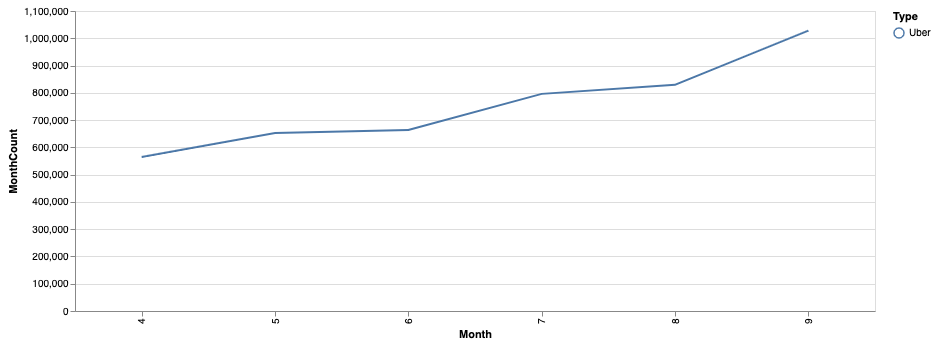

In [91]:

alt.Chart(temp).mark_line().encode(
    x='Month:N',
    y='MonthCount:Q', 
    color='Type:N',
    tooltip=['Month:Q']
).properties(
    width=800
)


In [109]:
#to order by month name
temp=uber_2014
months=["April", "May", "June", "July", "August", "September"]
temp['MonthName'] = pd.Categorical(temp['MonthName'],categories=months, ordered=True)
#temp.sort_values("MonthName")
temp.head()



,DateTime,Lat,Lon,Type,Hour,Month,MonthName,HourCount,MonthCount,Count
0,4/1/2014 0:11:00,40.7690,-73.9549,Uber,0,4,April,0,0,0
1,4/1/2014 0:17:00,40.7267,-74.0345,Uber,0,4,April,0,0,0
2,4/1/2014 0:21:00,40.7316,-73.9873,Uber,0,4,April,0,0,0
3,4/1/2014 0:28:00,40.7588,-73.9776,Uber,0,4,April,0,0,0
4,4/1/2014 0:33:00,40.7594,-73.9722,Uber,0,4,April,0,0,0


In [110]:
# Group by Month to get count per month
uber_byMonth = temp
uber_byMonth['Count'] = 0
uber_byMonth = temp.groupby(['MonthName'])['Count'].count()
print(type(uber_byMonth))


<class 'pandas.core.series.Series'>


In [111]:

#uber_byMonth.head()
uber_byMonth = uber_byMonth.reset_index()


uber_byMonth['Type']='Uber'

In [112]:
uber_byMonth

,MonthName,Count,Type
0,April,564516,Uber
1,May,652435,Uber
2,June,663844,Uber
3,July,796121,Uber
4,August,829275,Uber
5,September,1028136,Uber


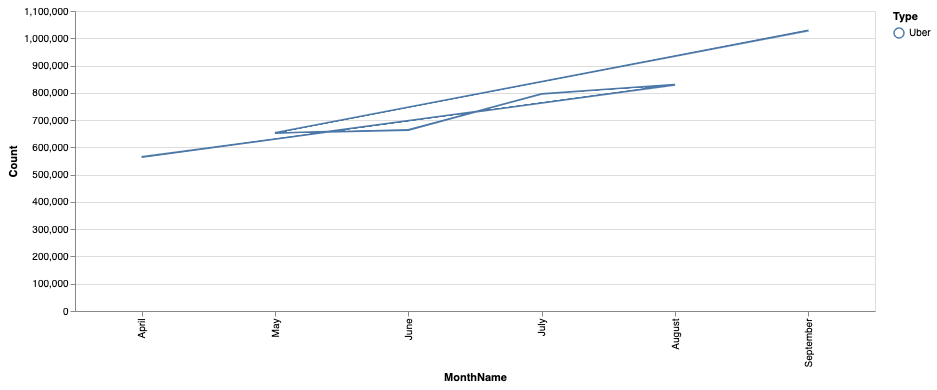

In [116]:
months=["April", "May", "June", "July", "August", "September"]

alt.Chart(uber_byMonth).mark_line().encode(
    x=alt.X('MonthName:N', sort=months),
    y='Count:Q',
    color='Type:N',
).properties(
    width=800
)

In [ ]:
# Modifying Dataframes

In [ ]:
print(taxi_2014['Month'].value_counts())

In [ ]:
#sum (missing 5?)
807456+796865+755445+731852+716026+692351

In [ ]:
#to order by month name
#taxi_2014['Month'] = pd.Categorical(taxi_2014['Month'],categories=months, ordered=True)
#taxi_2014.sort_values("Month")
#taxi_2014.head()

In [ ]:
# Group by Month to get count per month
taxi_byMonth = taxi_2014
taxi_byMonth['Count'] = 0
taxi_byMonth = taxi_2014.groupby(['Month'])['Count'].count()
#taxi_byMonth = taxi_2014.groupby(['Month','Type'])['Count'].count()
print(type(taxi_byMonth))

In [ ]:
#taxi_byMonth.head()
taxi_byMonth = taxi_byMonth.reset_index()
taxi_byMonth

In [ ]:
brush = alt.selection(type='interval')

# top line graph
points = alt.Chart(uber_taxi_byMonth).mark_line().encode(
    x= alt.X('Month:N', sort=months),
    #x='Month:N',
    y='Count:Q', # 
    color='Type:N',
    tooltip=['Count:Q']
).properties(
    selection=brush,
    width=800
)

# the bottom bar plot
bars = alt.Chart().mark_bar().encode(
    y='Type:N',
    color='Type:N',
    x='Count:Q'
).transform_filter(
    brush.ref() # the filter transform uses the selection
                # to filter the input data to this chart
).properties(
width=800
)

chart = alt.vconcat(points, bars, data=uber_taxi_byMonth) # vertical stacking
chart

In [ ]:
# Taxi and Uber Pick Up Locations

In [ ]:
import osmnx as ox
import networkx as nx

In [ ]:
import folium

In [ ]:
# Aggregate by Hour

In [ ]:
# Subset uber data to June

uber_jun = uber_2014[uber_2014['Month']=='June']
uber_jun.shape[0]

In [ ]:
# Subset taxi data to June

taxi_jun = taxi_2014[taxi_2014['Month']=='June']
taxi_jun.shape[0]

In [ ]:
# columns of interest
columns = ['DateTime', 'Lat', 'Lon', 'Month']

uber_jun2 = uber_jun[columns]
uber_jun2['Type'] = 'Uber'


taxi_jun2 = taxi_jun[columns]
taxi_jun2['Type'] = 'Taxi'

In [ ]:
# Hour Column for Uber

uber_jun2['Hour']=uber_jun2['DateTime']
uber_jun2.head()

In [ ]:
uber_jun2['Hour']=uber_jun2['Hour'].str[9:]
uber_jun2['Hour']=uber_jun2['Hour'].str[:-6]
uber_jun2.head()

In [ ]:
uber_jun3['Hour'] = pd.to_numeric(uber_jun3['Hour'])

In [ ]:
# Group by Hour

uber_jun2['HourCount'] = 0
uber_jun3 = uber_jun2.groupby(['Hour'])['HourCount'].count()

print(type(uber_jun3))

In [ ]:
uber_jun3.head()

In [ ]:
uber_jun3=uber_jun3.reset_index()

uber_jun3.head()

In [ ]:
uber_jun3

In [ ]:
# Group by Hour

uber_jun3 = uber_jun2
uber_jun3['HourCount'] = 0
uber_jun3 = uber_jun2.groupby(['Hour'])['HourCount'].count()

print(type(uber_jun3))

In [ ]:
uber_jun3.shape[0]

In [ ]:
uber_jun3

In [ ]:
#combine
uber_taxi_june = uber_jun2.append(taxi_jun2, ignore_index=True)
uber_taxi_june.shape

In [ ]:
# check correct join
uber_jun.shape[0] + taxi_jun.shape[0]

In [ ]:
# center the map on New York and add custom tiles (carto positron)

tile_url = 'https://{s}.basemaps.cartocdn.com/light_all/{z}/{x}/{y}{r}.png'
attr = '&copy; <a href="https://www.openstreetmap.org/copyright">OpenStreetMap</a> contributors &copy; <a href="https://carto.com/attributions">CARTO</a>'

#coordinates in lat and lon
m = folium.Map(
    location=[40.7128, -74.0060],
    zoom_start=13,
    tiles=tile_url,
    attr=attr
)

m

In [ ]:
# Taxi and Uber Avg Pick Ups by Hour

taxi_byHour = taxi_2014
uber_byHour = uber_2014

In [ ]:
# Create Hour Column by copying DateTime column first, then adjusting the string 

taxi_byHour['Hour']=taxi_byHour['DateTime']
taxi_byHour.head()

In [ ]:
# Extract just the hour value
for index, point in taxi_byHour.iterrows():
    taxi_byHour.loc[index,'Hour'] = point['Hour'][11:13]
    
taxi_byHour.head()

In [ ]:
# Perform the same with Uber data by Hour
uber_byHour['Hour']=uber_byHour['DateTime']
uber_byHour.head()

for index, point in uber_byHour.iterrows():
    uber_byHour.loc[index,'Hour'] = point['Hour'][9:]
    
uber_byHour.head()

In [ ]:
# Notes

#append
#uber_2014 = uber_apr14.append(uber_may14, ignore_index=True)
#uber_2014 = uber_2014.append(uber_jun14, ignore_index=True)
#uber_2014 = uber_2014.append(uber_jul14, ignore_index=True)
#uber_2014 = uber_2014.append(uber_aug14, ignore_index=True)
#uber_2014 = uber_2014.append(uber_sep14, ignore_index=True)

for index, point in uber_2014.iterrows():
    if point.DateTime.str[0] == '4':
        point['Month']='April'
    elif point.DateTime.str[0] == '5':
        point['Month']='May'
    elif point.DateTime.str[0] == '6':
        point['Month']='June'

        
        
#to order by month name
months=["April", "May", "June", "July", "August", "September"]
uber_2014['Month'] = pd.Categorical(uber_2014['Month'],categories=months, ordered=True)
uber_2014.sort_values("Month")
uber_2014.head()
# Group by Month to get count per month
uber_byMonth = uber_2014
uber_byMonth['Count'] = 0
uber_byMonth = uber_2014.groupby(['Month'])['Count'].count()
print(type(uber_byMonth))
#uber_byMonth.head()
uber_byMonth = uber_byMonth.reset_index()
uber_byMonth



#Simple line Graph
ax = plt.gca()
uber_byMonth.plot(kind='line',x='Month',y='Count',ax=ax)
taxi_byMonth.plot(kind='line',x='Month',y='Count',ax=ax)
plt.show()
#plt.savefig('output.png')